In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

> **<h3><font color="#0000FF">1. Compréhension du Projet et des Données</font></h3>**

> **<font color="#0000FF">a. Définition du Problème :</font>**

> **<font color="#0000FF">b. Compréhension des Données ::</font>**

> **<h3><font color="#0000FF">2. Préparation et 3. prétraitement des Données</font></h3>**

In [2]:
# Charger les données

url = 'https://raw.githubusercontent.com/pefura/IFPERA/main/Base_ronflements_IFPERA.csv'
df = pd.read_csv(url, sep =';')

In [3]:
# Afficher les informations initiales sur les colonnes
print("Informations initiales sur les colonnes :")
print(df.describe())

# Gestion des valeurs manquantes
print("\nValeurs manquantes avant imputation :")
print(df.isnull().sum())

# Remplacer les valeurs manquantes (chaînes vides) par NaN
df['poids'] = pd.to_numeric(df['poids'].replace('', np.nan), errors='coerce')
df['taille'] = pd.to_numeric(df['taille'].replace('', np.nan), errors='coerce')
df['tour_hanche'] = pd.to_numeric(df['tour_hanche'].replace('', np.nan), errors='coerce')
df['tour_taille'] = pd.to_numeric(df['tour_taille'].replace('', np.nan), errors='coerce')
df['age'] = pd.to_numeric(df['age'].replace('', np.nan), errors='coerce')

# Imputation par la médiane pour les valeurs manquantes
df['poids'].fillna(df['poids'].median(), inplace=True)
df['taille'].fillna(df['taille'].median(), inplace=True)
df['tour_hanche'].fillna(df['tour_hanche'].median(), inplace=True)
df['tour_taille'].fillna(df['tour_taille'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)

print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())

# Conversion des types de données
df['poids'] = df['poids'].astype(float)
df['taille'] = df['taille'].astype(float)
df['tour_hanche'] = df['tour_hanche'].astype(float)
df['tour_taille'] = df['tour_taille'].astype(float)
df['age'] = df['age'].astype(float)

# Calculer l'IMC directement dans le DataFrame
df['imc'] = df['poids'] / (df['taille'] ** 2)

# Suprimer les variables poids et tailles
df = df.drop(columns=['poids', 'taille'])

# Gestion des valeurs aberrantes
# Détection des valeurs aberrantes avec la méthode IQR 
columns_to_check = ['imc', 'tour_hanche', 'tour_taille', 'age']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remplacer les valeurs aberrantes par la médiane
    median_value = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])


# Normalisation des données avec RobustScaler
scaler = RobustScaler()
df[columns_to_check] = scaler.fit_transform(df[columns_to_check])


# Afficher les informations finales sur les colonnes
print("\nInformations finales sur les colonnes :")
print(df.describe())

print('informations sur les variables de la base')
print(df.info())

# Afficher le DataFrame final
print("\nDataFrame final :")
print(df.head(3))

Informations initiales sur les colonnes :
              sexe          age  Ronflements
count  6186.000000  6186.000000  6186.000000
mean      1.539929    42.807792     0.275299
std       0.498443    17.341743     0.446701
min       1.000000    19.000000     0.000000
25%       1.000000    27.000000     0.000000
50%       2.000000    40.000000     0.000000
75%       2.000000    56.000000     1.000000
max       2.000000    98.000000     1.000000

Valeurs manquantes avant imputation :
sexe           0
age            0
poids          0
taille         0
tour_hanche    0
tour_taille    0
Ronflements    0
dtype: int64

Valeurs manquantes après imputation :
sexe           0
age            0
poids          0
taille         0
tour_hanche    0
tour_taille    0
Ronflements    0
dtype: int64

Informations finales sur les colonnes :
              sexe          age  tour_hanche  tour_taille  Ronflements  \
count  6186.000000  6186.000000  6186.000000  6186.000000  6186.000000   
mean      1.539929    

In [4]:
df.head(2)

,sexe,age,tour_hanche,tour_taille,Ronflements,imc
0,2,0.620690,-0.866667,0.0000,0,-0.263158
1,2,-0.655172,-0.733333,-1.5625,0,-0.736842


> **<h3><font color="#0000FF">4. Encodage des Variables Catégorielles</font></h3>**

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Ronflements'] = label_encoder.fit_transform(df['Ronflements'])
df['sexe'] = label_encoder.fit_transform(df['sexe'])

> **<h3><font color="#0000FF"> 4. Developpement des modèles </font></h3>**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

from scipy import stats

from sklearn import preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import make_scorer#, roc_auc_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

> **<font color="#0000FF">a. Selection des prédicteurs et pertinents:</font>**

###### Nous allons exclure le sexe parmi les prédicteurs

> **<font color="#0000FF">b. Selection des prédicteurs et de la variable réponse :</font>**

In [9]:
# Defining target(y) and features (X)
y = df['Ronflements']
X = df.drop(columns =['Ronflements', 'sexe'])

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6186, 4)
y shape: (6186,)


> **<font color="#0000FF">c. diviser la base en une base d entrainement et une base de test:</font>**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, 
                                                    stratify=y, random_state=0 )

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4948, 4)
y_train shape: (4948,)
X_test shape: (1238, 4)
y_test shape: (1238,)


In [11]:
from boruta import BorutaPy   

# Créer un modèle Random Forest  
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)  

# Initialiser Boruta  
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)  

# Exécuter Boruta  
boruta_selector.fit(X_train.values, y_train.values)  

# Obtenir les résultats  
selected_features = boruta_selector.support_  

print("Caractéristiques sélectionnées :", selected_features)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	4
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	0
Caractéristiques sélectionnées : [ True  True  True  True]


> **<font color="#0000FF">d. Instantiation des modèles :</font>**

In [12]:
# Random Forest
RF = RandomForestClassifier (random_state=0)

# Réseau des neurones
MLP = MLPClassifier(random_state=0)

> **<h3><font color="#0000FF"> 5. Recherche des hypers paramètres </font></h3>**

In [13]:
# Définir la plage des hyperparamètres pour le RF
distributions = dict(max_depth=np.arange(1,20),
                     n_estimators=np.arange(60,600),
                     max_features=np.arange(0, 5),
                     max_leaf_nodes=np.arange(10,500),
                     min_samples_split=np.arange(1,15),
                    )

# Configurer la recherche aléatoire
RF_CV = RandomizedSearchCV(RF, distributions, random_state=0, scoring = 'f1')
RF_search =  RF_CV.fit(X_train, y_train)

In [14]:
# Définir la plage des hyperparamètres pour le MLP
distributions = dict(hidden_layer_sizes=np.arange(1,1000),
                     activation=['tanh', 'relu'],
                     solver=['sgd', 'adam'],
                     alpha=np.arange(0,1),
                     learning_rate=['constant', 'adaptative']
                    )

# Configurer la recherche aléatoire
MLP_CV = RandomizedSearchCV(MLP, distributions, random_state=0, scoring = 'f1')
MLP_search =  MLP_CV.fit(X_train, y_train)

In [15]:
print(RF_search.best_params_)
print(MLP_search.best_params_) 

{'n_estimators': 240, 'min_samples_split': 13, 'max_leaf_nodes': 286, 'max_features': 2, 'max_depth': 15}
{'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': 259, 'alpha': 0, 'activation': 'tanh'}


> **<font color="#0000FF">a. Instancier Modèles optimisé :</font>**

In [16]:
RF_op = RandomForestClassifier (n_estimators= 240,max_depth=13,max_features=2,min_samples_split=13,max_leaf_nodes=289,random_state=42)
MLP_op = MLPClassifier(solver= 'adam', learning_rate='constant', hidden_layer_sizes=259, alpha=0, activation= 'tanh', random_state=42)

> **<font color="#0000FF">b. Entrainement des Modèles optimisé :</font>**

In [17]:
RF_op = RF_op.fit(X_train, y_train)
MLP_op = MLP_op.fit(X_train, y_train)

> **<h3><font color="#0000FF"> 6. Evaluation des modèles </font></h3>**

> **<font color="#0000FF">a. Fonction d'évaluation :</font>**

In [18]:
def evaluation(model):
    ypred = model.predict(X_test)
    y_score = model.predict_proba(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

> **<font color="#0000FF">b. Evaluation du modèle RF :</font>**

In [19]:
print("TRAIN REPORT")
print(classification_report(y_train, RF_op.predict(X_train)))

print("TEST REPORT")
print(evaluation(model=RF_op))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      3586
           1       0.90      0.46      0.61      1362

    accuracy                           0.84      4948
   macro avg       0.86      0.72      0.76      4948
weighted avg       0.85      0.84      0.82      4948

TEST REPORT
[[827  70]
 [260  81]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       897
           1       0.54      0.24      0.33       341

    accuracy                           0.73      1238
   macro avg       0.65      0.58      0.58      1238
weighted avg       0.70      0.73      0.69      1238

None


> **<font color="#0000FF">c. Evaluation du modèle MLP :</font>**

### Nous somme face à un problème de prédiction binaire nous pouvons nous baser sur la spécificité et la courbe roc pour le choi du modèle

In [20]:
print("TRAIN REPORT")
print(classification_report(y_train, MLP_op.predict(X_train)))

print("TEST REPORT")
print(evaluation(model=MLP_op))

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      3586
           1       0.57      0.19      0.28      1362

    accuracy                           0.74      4948
   macro avg       0.66      0.57      0.56      4948
weighted avg       0.70      0.74      0.69      4948

TEST REPORT
[[850  47]
 [289  52]]
              precision    recall  f1-score   support

           0       0.75      0.95      0.83       897
           1       0.53      0.15      0.24       341

    accuracy                           0.73      1238
   macro avg       0.64      0.55      0.54      1238
weighted avg       0.69      0.73      0.67      1238

None


In [21]:
def evaluer(model, X_train = X_train, X_test=X_test):
    model.fit(X_train, y_train)
    # Importer les modules nécessaires pour le calcul des métriques
    from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
    from imblearn.metrics import specificity_score
    # Prédictions sur les données du test set
    ypred = model.predict(X_test)
    # Calcul de l'AUC et spécificité
    model_probs = model.predict_proba(X_test)
    model_probs = model_probs[:, 1]
    model_auc = roc_auc_score(y_test, model_probs)
    spe = specificity_score(y_test, ypred, average=None)
    # Matrice de confuson et scores associés dont F1
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print("SPECIFICITY")
    print(spe)
    print("AUROC")
    print(model_auc)

In [22]:
evaluer(model=RF_op, X_train= X_train, X_test=X_test)

CONFUSION MATRIX
[[827  70]
 [260  81]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       897
           1       0.54      0.24      0.33       341

    accuracy                           0.73      1238
   macro avg       0.65      0.58      0.58      1238
weighted avg       0.70      0.73      0.69      1238

SPECIFICITY
[0.23753666 0.9219621 ]
AUROC
0.6759710602627853


In [23]:
evaluer(model=MLP_op, X_train= X_train, X_test=X_test)

CONFUSION MATRIX
[[850  47]
 [289  52]]
              precision    recall  f1-score   support

           0       0.75      0.95      0.83       897
           1       0.53      0.15      0.24       341

    accuracy                           0.73      1238
   macro avg       0.64      0.55      0.54      1238
weighted avg       0.69      0.73      0.67      1238

SPECIFICITY
[0.15249267 0.94760312]
AUROC
0.6880053093236823


> **<font color="#0000FF">d. courbes apprentissage:</font>**

[  39  202  366  529  692  855 1019 1182 1345 1508 1672 1835 1998 2162
 2325 2488 2651 2815 2978 3141 3304 3468 3631 3794 3958]
[  39  202  366  529  692  855 1019 1182 1345 1508 1672 1835 1998 2162
 2325 2488 2651 2815 2978 3141 3304 3468 3631 3794 3958]


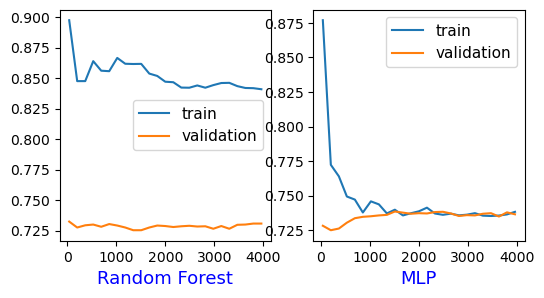

In [24]:
fig = plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
N, train_score, val_score = learning_curve(RF_op, X_train, y_train,
                                           train_sizes = np.linspace(0.01, 1.0, 25), cv = 5)
print(N)
plt.plot(N,train_score.mean(axis=1), label='train')
plt.plot(N,val_score.mean(axis=1), label='validation')
plt.xlabel('Random Forest', color = 'b', fontsize = 13)
plt.legend(fontsize = 11)


plt.subplot(1,2,2)
N, train_score, val_score = learning_curve(MLP_op, X_train, y_train,
                                           train_sizes = np.linspace(0.01, 1.0, 25), cv = 5)
print(N)
plt.plot(N,train_score.mean(axis=1), label='train')
plt.plot(N,val_score.mean(axis=1), label='validation')
plt.xlabel('MLP', color = 'b', fontsize = 13)
plt.legend(fontsize = 11)

> **<font color="#0000FF">d. courbes ROC des modèles:</font>**

In [25]:
 from sklearn.metrics import roc_curve, auc  

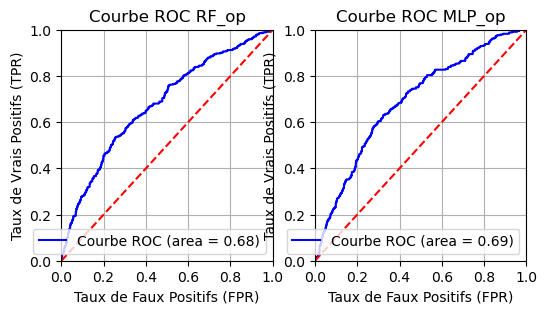

In [26]:
model = RF_op = RandomForestClassifier (n_estimators= 240,max_depth=13,max_features=2,min_samples_split=13,max_leaf_nodes=289,random_state=42) 
model.fit(X_train, y_train)  

# Obtenir les probabilités de la classe positive  
y_scores = model.predict_proba(X_test)[:, 1]  

# Calculer la courbe ROC  
fpr, tpr, thresholds = roc_curve(y_test, y_scores)  
roc_auc = auc(fpr, tpr)  

# Tracer la courbe ROC  
fig = plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='blue', label='Courbe ROC (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # ligne de chance  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.xlabel('Taux de Faux Positifs (FPR)')  
plt.ylabel('Taux de Vrais Positifs (TPR)')  
plt.title('Courbe ROC RF_op')  
plt.legend(loc='lower right')  
plt.grid()  


model1 = MLP_op = MLPClassifier(solver= 'adam', learning_rate='constant', hidden_layer_sizes=259, alpha=0, activation= 'tanh', random_state=42)
model1.fit(X_train, y_train) 

y_scores = model1.predict_proba(X_test)[:, 1]  
# Calculer la courbe ROC  
fpr, tpr, thresholds = roc_curve(y_test, y_scores)  
roc_auc = auc(fpr, tpr) 

plt.subplot(1,2,2)
plt.plot(fpr, tpr, color='blue', label='Courbe ROC (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='red', linestyle='--') # ligne de chance  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.0])  
plt.xlabel('Taux de Faux Positifs (FPR)')  
plt.ylabel('Taux de Vrais Positifs (TPR)')  
plt.title('Courbe ROC MLP_op')  
plt.legend(loc='lower right')  
plt.grid()  

### Le modèle choisi est le réseau de neurones artificiel (f1_score plus élévée)